In [ ]:
import gdown
import os
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

### Prepare data


*   Use gdown to download data
*   Read file with pandas lib



In [ ]:
pop_str = pd.read_csv('/content/str_pop.txt', delim_whitespace=True)
pop_str.head()

<ipython-input-51-54507557689f>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pop_str = pd.read_csv('/content/str_pop.txt', delim_whitespace=True)


,ind,pop,CSF1PO,CSF1PO.1,D10S1248,D10S1248.1,D12S391,D12S391.1,D13S317,D13S317.1,...,Penta_D,Penta_D.1,Penta_E,Penta_E.1,TH01,TH01.1,TPOX,TPOX.1,vWA,vWA.1
0,241821,VN,11.0,12.0,13.0,15.0,18.0,23.0,8.0,10.0,...,9.0,9.0,18.0,19.0,10.0,10.0,8.0,9.0,17.0,18.0
1,241828,VN,9.0,12.0,14.0,15.0,20.0,21.0,8.0,9.0,...,10.0,10.0,11.0,13.0,6.0,9.0,8.0,11.0,17.0,17.0
2,241835,VN,12.0,12.0,13.0,14.0,20.0,20.0,9.0,10.0,...,7.0,9.0,11.0,13.0,9.0,9.0,8.0,8.0,14.0,16.0
3,241856,VN,12.0,13.0,13.0,13.0,18.0,19.0,11.0,12.0,...,9.0,12.0,11.0,18.0,8.0,9.0,11.0,11.0,14.0,17.0
4,241863,VN,10.0,10.0,14.0,15.0,18.0,20.0,8.0,11.0,...,9.0,9.0,11.0,13.0,7.0,7.0,10.0,12.0,14.0,14.0


In [ ]:
len(pop_str.columns)

48

In [ ]:
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AA": "Mỹ-Phi", "Asian": "Châu Á", "VN": "Việt Nam"}

pop_str['pop'] = pop_str['pop'].map(populations)
pop_str.head()

,ind,pop,CSF1PO,CSF1PO.1,D10S1248,D10S1248.1,D12S391,D12S391.1,D13S317,D13S317.1,...,Penta_D,Penta_D.1,Penta_E,Penta_E.1,TH01,TH01.1,TPOX,TPOX.1,vWA,vWA.1
0,241821,Việt Nam,11.0,12.0,13.0,15.0,18.0,23.0,8.0,10.0,...,9.0,9.0,18.0,19.0,10.0,10.0,8.0,9.0,17.0,18.0
1,241828,Việt Nam,9.0,12.0,14.0,15.0,20.0,21.0,8.0,9.0,...,10.0,10.0,11.0,13.0,6.0,9.0,8.0,11.0,17.0,17.0
2,241835,Việt Nam,12.0,12.0,13.0,14.0,20.0,20.0,9.0,10.0,...,7.0,9.0,11.0,13.0,9.0,9.0,8.0,8.0,14.0,16.0
3,241856,Việt Nam,12.0,13.0,13.0,13.0,18.0,19.0,11.0,12.0,...,9.0,12.0,11.0,18.0,8.0,9.0,11.0,11.0,14.0,17.0
4,241863,Việt Nam,10.0,10.0,14.0,15.0,18.0,20.0,8.0,11.0,...,9.0,9.0,11.0,13.0,7.0,7.0,10.0,12.0,14.0,14.0


In [ ]:
pop_str['pop'].value_counts()


,count
pop,
Việt Nam,408
Mỹ Da Trắng,361
Mỹ-Phi,342
Mỹ-Latin,236
Châu Á,97


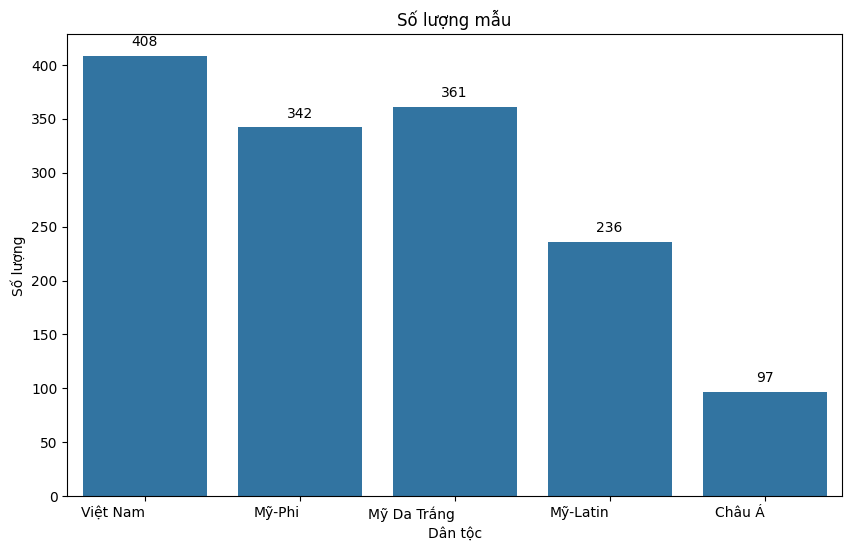

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='pop', data=pop_str)

# Add labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset label by 5 pixels
                textcoords="offset points",
                ha='center', va='bottom')

plt.title('Số lượng mẫu')
plt.xlabel('Dân tộc')
plt.ylabel('Số lượng')
plt.xticks(rotation=0, ha='right')
plt.show()


In [ ]:
def normalize_table(df):
    df_total_normalized =  pd.DataFrame()
    # concatenate locus columns + unnamed columns

    for i in range(0, len(df.columns) -1):
        if i not in [0, 1] and df.columns[i].__contains__(".1") == False:
            # concatenate locus columns + unnamed columns in 1 column with splitter ","
            # and add to new dataframe
            df_total_normalized[df.columns[i]] = df[df.columns[i]].map(str) + "," + df[df.columns[i+1]].map(str)

        elif i in [0,1]:
            df_total_normalized[df.columns[i]] = df[df.columns[i]]

    return df_total_normalized


## Tính tần số của các quần thể

In [ ]:
def calculate_AF(df_pop):
    locus_pops = {}
    for i in df_pop.columns:
        if i !="ind" and i != "pop":
            locus_pops[f"{i}"] = []
            for j in df_pop[i].values:
                if j != 0 and not (pd.isna(j) or str(j).lower() == "nan"):
                    locus_1 = str(j).split(",")[0]
                    locus_2 = str(j).split(",")[1]
                    locus_pops[i].append(locus_1)
                    locus_pops[i].append(locus_2)
    locus_pops.keys()

    # count the number of each allele in each locus
    locus_pops_count = {}
    for i in locus_pops.keys():
        locus_pops_count[i] = dict(Counter(locus_pops[i]))

    # calculate the allele frequency
    locus_pops_freq = {}
    for i in locus_pops_count.keys():
        locus_pops_freq[i] = {}
        for j in locus_pops_count[i].keys():
            locus_pops_freq[i][j] = round(locus_pops_count[i][j] / len(locus_pops[i]), 3)

    # convert the dictionary to dataframe

    df_locus_pops_freq = pd.DataFrame(locus_pops_freq)
    # sort the row through the index with be the float number
    df_locus_pops_freq.index = df_locus_pops_freq.index.astype(float)
    df_locus_pops_freq = df_locus_pops_freq.sort_index()
    return df_locus_pops_freq

In [ ]:
df_total_normalized = normalize_table(pop_str)
af_total = calculate_AF(df_total_normalized)
af_total_transpose  = af_total.T
af_total_transpose["pop"] = "Population Set"
af_total_transpose.fillna(0, inplace=True)
af_total_transpose.head()

,2.2,3.2,5.0,6.0,7.0,8.0,8.1,9.0,9.1,9.3,...,34.2,35.0,35.2,36.0,37.0,38.0,39.0,43.2,NaN,pop
CSF1PO,0.0,0.0,0.0,0.0,0.018,0.016,0.0,0.031,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Population Set
D10S1248,0.0,0.0,0.0,0.0,0.000,0.001,0.0,0.001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Population Set
D12S391,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Population Set
D13S317,0.0,0.0,0.0,0.0,0.001,0.159,0.0,0.096,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Population Set
D16S539,0.0,0.0,0.0,0.0,0.000,0.016,0.0,0.179,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Population Set


In [ ]:
pops = df_total_normalized['pop'].unique()
pops

array(['Việt Nam', 'Mỹ-Phi', 'Mỹ Da Trắng', 'Mỹ-Latin', 'Châu Á'],
      dtype=object)

## tính tần số allen trong từng cặp dân tộc

In [ ]:
## tính tần số allen trong từng cặp dân tộc
af_pairs = pd.DataFrame()
for pop in pops:
    for pop2 in pops:
        if pop != pop2:
            df_pop = df_total_normalized[df_total_normalized["pop"].isin([pop, pop2])]
            af_pop = calculate_AF(df_pop)
            af_pop_transpose = af_pop.T
            af_pop_transpose["pop"] = f"{pop}_{pop2}"
            af_pairs = pd.concat([af_pairs, af_pop_transpose])


af_pairs.to_csv("AF_pairs.csv", sep="\t")


In [ ]:
af_pairs.fillna(0, inplace=True)
af_pairs.head()

,2.2,3.2,5.0,6.0,7.0,8.0,9.0,9.1,9.3,10.0,...,pop,8.1,15.4,10.3,20.3,23.3,19.4,24.3,30.3,43.2
CSF1PO,0.0,0.0,0.000,0.0,0.028,0.026,0.037,0.0,0.0,0.225,...,Việt Nam_Mỹ-Phi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D10S1248,0.0,0.0,0.000,0.0,0.000,0.001,0.001,0.0,0.0,0.003,...,Việt Nam_Mỹ-Phi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D12S391,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.000,...,Việt Nam_Mỹ-Phi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D13S317,0.0,0.0,0.000,0.0,0.001,0.185,0.077,0.0,0.0,0.075,...,Việt Nam_Mỹ-Phi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D16S539,0.0,0.0,0.001,0.0,0.000,0.015,0.203,0.0,0.0,0.125,...,Việt Nam_Mỹ-Phi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
af_pairs = af_pairs.loc[:, af_pairs.columns.notna()]
af_pairs.index

Index(['CSF1PO', 'D10S1248', 'D12S391', 'D13S317', 'D16S539', 'D18S51',
       'D19S433', 'D1S1656', 'D21S11', 'D22S1045',
       ...
       'D5S818', 'D6S1043', 'D7S820', 'D8S1179', 'FGA', 'Penta_D', 'Penta_E',
       'TH01', 'TPOX', 'vWA'],
      dtype='object', length=460)

### Tính AF của từng Allen trên từng dân tộc 1

In [ ]:
df_total_normalized["pop"].unique()

array(['Việt Nam', 'Mỹ-Phi', 'Mỹ Da Trắng', 'Mỹ-Latin', 'Châu Á'],
      dtype=object)

In [ ]:
## tính tần số allen trong từng cặp dân tộc
df_af_subpop = pd.DataFrame()
df_af_subpop_pca = pd.DataFrame()
for pop in pops:
      df_pop = df_total_normalized[df_total_normalized["pop"] == pop]
      af_pop = calculate_AF(df_pop)
      af_pop_cp = af_pop.copy()
      af_pop_cp["pop"] = pop
      df_af_subpop_pca= pd.concat([df_af_subpop_pca, af_pop_cp])
      af_pop_transpose = af_pop.T

      af_pop_transpose["pop"] = pop
      df_af_subpop = pd.concat([df_af_subpop, af_pop_transpose])

df_af_subpop.to_csv("AF_subpop.csv", sep="\t")
df_af_subpop_pca


,CSF1PO,D10S1248,D12S391,D13S317,D16S539,D18S51,D19S433,D1S1656,D21S11,D22S1045,...,D6S1043,D7S820,D8S1179,FGA,Penta_D,Penta_E,TH01,TPOX,vWA,pop
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.045,0.001,NaN,NaN,Việt Nam
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.001,NaN,0.132,NaN,NaN,Việt Nam
7.0,0.005,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.011,NaN,NaN,0.044,NaN,0.357,NaN,NaN,Việt Nam
8.0,0.001,NaN,NaN,0.317,0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,0.150,0.001,NaN,0.077,0.001,0.048,0.531,NaN,Việt Nam
9.0,0.034,NaN,NaN,0.114,0.221,NaN,0.004,NaN,NaN,NaN,...,NaN,0.066,NaN,NaN,0.336,0.021,0.357,0.115,NaN,Việt Nam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Châu Á
32.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Châu Á
33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Châu Á
33.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Châu Á


In [ ]:
df_af_subpop = df_af_subpop.loc[:, df_af_subpop.columns.notna()]
df_af_subpop.fillna(0, inplace=True)
df_af_subpop.head()

,5.0,6.0,7.0,8.0,9.0,9.1,9.3,10.0,11.0,11.2,...,39.0,8.1,15.4,10.3,20.3,23.3,19.4,24.3,30.3,43.2
CSF1PO,0.0,0.0,0.005,0.001,0.034,0.0,0.0,0.203,0.292,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D10S1248,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D12S391,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D13S317,0.0,0.0,0.002,0.317,0.114,0.0,0.0,0.113,0.248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D16S539,0.0,0.0,0.000,0.001,0.221,0.0,0.0,0.132,0.282,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_pop

,ind,pop,CSF1PO,D10S1248,D12S391,D13S317,D16S539,D18S51,D19S433,D1S1656,...,D5S818,D6S1043,D7S820,D8S1179,FGA,Penta_D,Penta_E,TH01,TPOX,vWA
1347,OT06795,Châu Á,"12.0,12.0","12.0,12.0","17.0,19.0","8.0,9.0","12.0,13.0","13.0,14.0","13.0,16.2","11.0,15.0",...,"11.0,13.0","13.0,18.0","11.0,11.0","11.0,17.0","23.0,26.0","9.0,9.0","11.0,15.0","7.0,9.0","8.0,9.0","17.0,18.0"
1348,PC16856,Châu Á,"11.0,11.0","12.0,13.0","19.0,19.0","8.0,11.0","9.0,11.0","15.0,16.0","12.0,15.2","15.0,18.3",...,"11.0,12.0","10.0,10.0","8.0,11.0","15.0,15.0","21.0,25.0","9.0,9.0","15.0,22.0","7.0,8.0","8.0,12.0","17.0,18.0"
1349,UT57635,Châu Á,"11.0,13.0","13.0,14.0","19.0,24.3","11.0,11.0","11.0,12.0","14.0,17.0","15.2,15.2","15.0,16.0",...,"12.0,13.0","11.0,15.0","8.0,13.0","11.0,16.0","21.0,22.0","9.0,9.0","11.0,11.0","6.0,7.0","8.0,9.0","17.0,18.0"
1350,C01A,Châu Á,"7.0,11.0","13.0,14.0","19.0,21.0","8.0,9.0","9.0,14.0","15.0,17.0","13.0,14.0","12.0,17.3",...,"7.0,12.0","14.0,14.0","9.0,12.0","10.0,11.0","22.0,23.0","9.0,12.0","11.0,12.0","6.0,9.0","8.0,8.0","17.0,18.0"
1351,C02A,Châu Á,"10.0,10.0","13.0,15.0","15.0,20.0","8.0,12.0","11.0,12.0","14.0,17.0","13.0,14.2","15.0,18.0",...,"12.0,13.0","11.0,17.0","9.0,10.0","11.0,14.0","19.0,22.0","9.0,11.0","10.0,11.0","7.0,9.0","8.0,10.0","17.0,17.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,C95A,Châu Á,"12.0,13.0","13.0,14.0","18.0,22.0","8.0,12.0","9.0,12.0","13.0,16.0","13.0,15.2","14.0,17.0",...,"11.0,11.0","14.0,14.0","11.0,11.0","11.0,12.0","19.0,22.0","9.0,9.0","10.0,21.0","7.0,7.0","8.0,8.0","17.0,18.0"
1440,C96A,Châu Á,"10.0,11.0","13.0,13.0","18.0,21.0","8.0,11.0","9.0,11.0","15.0,21.0","14.2,16.2","15.0,16.0",...,"11.0,12.0","11.0,14.0","10.0,12.0","10.0,13.0","20.0,21.0","10.0,12.0","10.0,12.0","6.0,6.0","8.0,12.0","14.0,18.0"
1441,C97A,Châu Á,"10.0,12.0","13.0,14.0","20.0,25.0","8.0,11.0","9.0,12.0","14.0,14.0","14.0,15.2","15.0,17.3",...,"8.0,10.0","17.0,17.0","11.0,11.0","12.0,16.0","22.0,23.0","9.0,9.0","17.0,17.0","7.0,9.0","11.0,12.0","14.0,18.0"
1442,C98A,Châu Á,"10.0,11.0","16.0,16.0","15.0,18.0","10.0,12.0","9.0,10.0","13.0,16.0","13.0,15.0","15.0,17.0",...,"9.0,11.0","12.0,19.0","10.0,10.0","12.0,14.0","22.0,23.0","11.0,12.0","10.0,13.0","6.0,6.0","8.0,9.0","14.0,17.0"


# Tính Fst

In [ ]:
def compute_average_fst(df_af_subpop, af_pairs, locus_col='Locus', population_col='pop', dropped_columns=None):
    if dropped_columns is None:
        dropped_columns = ['Locus', 'pop', 'Number']

    populations = df_af_subpop[population_col].unique()
    populations = populations[populations != 'Population']

    fst_matrix = pd.DataFrame(index=populations, columns=populations)
    fst_values = {}
    for locus in df_af_subpop[locus_col].unique():
        print(locus)

        df_locus = df_af_subpop[df_af_subpop[locus_col] == locus]
        # print(df_locus)
        if len((df_locus[population_col]).unique()) < 5:
            print(locus)
            continue
        else:
            # Calculate HS for each population
            h_e = {}
            n_pop = {}
            for pop in populations:
                locus_pop = df_locus[df_locus[population_col] == pop]
                n_pop[pop] = locus_pop['Number'].values[0]
                locus_pop = locus_pop.drop(dropped_columns, axis=1)
                h_e[pop] = 1 - (locus_pop**2).sum(axis=1).values[0]

            # Calculate and store FST for each pair of populations
            for pop1 in populations:
                for pop2 in populations:
                    if pop1 != pop2:
                        tmp_ht = af_pairs[af_pairs[locus_col] == locus]

                        h_t = 1 - (tmp_ht[tmp_ht['pop']==f'{pop1}_{pop2}'].drop(['Locus', 'pop'], axis=1)**2).sum(axis=1).values
                        h_s = (h_e[pop1]*n_pop[pop1] + h_e[pop2]*n_pop[pop2]) / (n_pop[pop1] + n_pop[pop2])
                        fst_value = (h_t - h_s) / h_t
                        if fst_value < 0: fst_value=0
                        if f"{pop1},{pop2}" not in fst_values:
                            fst_values[f"{pop1},{pop2}"] = []
                            fst_values[f"{pop1},{pop2}"].append(fst_value)
                        else:
                            fst_values[f"{pop1},{pop2}"].append(fst_value)


    for pop1 in populations:
        for pop2 in populations:
            if pop1 != pop2:
                fst_matrix.loc[pop1, pop2] = (sum(fst_values[f"{pop1},{pop2}"])/len(fst_values[f"{pop1},{pop2}"])) # Average across all loci
    fst_matrix[fst_matrix < 0] = 0
    fst_matrix.fillna(0, inplace=True)
    return fst_matrix, fst_values, n_pop, h_t

In [ ]:
df_af_subpop = pd.read_csv('/content/AF_subpop.csv', sep='\t')
af_pairs = pd.read_csv('/content/AF_pairs.csv', sep='\t')
df_af_subpop.rename(columns={'Unnamed: 0': 'Locus'}, inplace=True)
af_pairs.rename(columns={'Unnamed: 0': 'Locus'}, inplace=True)

In [ ]:
# map số lượng quần thể vào
df_af_subpop['Number'] = df_af_subpop['pop'].map(pop_str["pop"].value_counts().to_dict())
af_pairs['Number'] = af_pairs['pop'].map(pop_str["pop"].value_counts().to_dict())

In [ ]:
af_pairs['pop']

,pop
0,Việt Nam_Mỹ-Phi
1,Việt Nam_Mỹ-Phi
2,Việt Nam_Mỹ-Phi
3,Việt Nam_Mỹ-Phi
4,Việt Nam_Mỹ-Phi
...,...
455,Châu Á_Mỹ-Latin
456,Châu Á_Mỹ-Latin
457,Châu Á_Mỹ-Latin
458,Châu Á_Mỹ-Latin


In [ ]:
df_af_subpop

,Locus,5.0,6.0,7.0,8.0,9.0,9.1,9.3,10.0,11.0,...,8.1,15.4,10.3,20.3,23.3,19.4,24.3,30.3,43.2,Number
0,CSF1PO,NaN,NaN,0.005,0.001,0.034,NaN,NaN,0.203,0.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
1,D10S1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
2,D12S391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
3,D13S317,NaN,NaN,0.002,0.317,0.114,NaN,NaN,0.113,0.248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
4,D16S539,NaN,NaN,NaN,0.001,0.221,NaN,NaN,0.132,0.282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Penta_D,NaN,0.01,NaN,0.005,0.314,NaN,NaN,0.186,0.180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97
111,Penta_E,0.072,NaN,NaN,0.005,0.026,NaN,NaN,0.062,0.160,...,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,97
112,TH01,NaN,0.17,0.268,0.072,0.443,NaN,0.041,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97
113,TPOX,NaN,NaN,NaN,0.546,0.082,NaN,NaN,0.031,0.294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97


CSF1PO
D10S1248
D12S391
D13S317
D16S539
D18S51
D19S433
D1S1656
D21S11
D22S1045
D2S1338
D2S441
D3S1358
D5S818
D6S1043
D7S820
D8S1179
FGA
Penta_D
Penta_E
TH01
TPOX
vWA


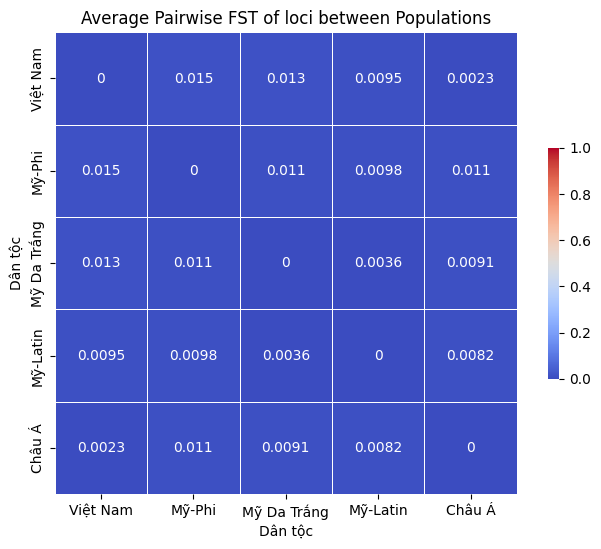

In [ ]:
fst_matrix, fst_values, n_pop, h_e = compute_average_fst(df_af_subpop, af_pairs, locus_col='Locus', population_col='pop', dropped_columns=None)

plt.figure(figsize=(8, 6))
sns.heatmap(fst_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5}, linewidths=.5)

plt.title('Average Pairwise FST of loci between Populations')
plt.xlabel('Dân tộc')
plt.ylabel('Dân tộc')
plt.show()

In [ ]:
# add fst_values to DataFrame
fst_df = pd.DataFrame.from_dict(fst_values)
fst_df["Locus"] = df_af_subpop['Locus']
# move the last column to the first columns
fst_df = fst_df[['Locus'] + [col for col in fst_df.columns if col != 'Locus']]
fst_df.head()

,Locus,"Việt Nam,Mỹ-Phi","Việt Nam,Mỹ Da Trắng","Việt Nam,Mỹ-Latin","Việt Nam,Châu Á","Mỹ-Phi,Việt Nam","Mỹ-Phi,Mỹ Da Trắng","Mỹ-Phi,Mỹ-Latin","Mỹ-Phi,Châu Á","Mỹ Da Trắng,Việt Nam",...,"Mỹ Da Trắng,Mỹ-Latin","Mỹ Da Trắng,Châu Á","Mỹ-Latin,Việt Nam","Mỹ-Latin,Mỹ-Phi","Mỹ-Latin,Mỹ Da Trắng","Mỹ-Latin,Châu Á","Châu Á,Việt Nam","Châu Á,Mỹ-Phi","Châu Á,Mỹ Da Trắng","Châu Á,Mỹ-Latin"
0,CSF1PO,[0.00582951835734883],[0.00015869875807601624],[0.0013982606640103926],[0.0022773669353829814],[0.00582951835734883],[0.004513932806213978],[0.003906556827269154],[0.0050175346360454435],[0.00015869875807601624],...,[0.0008840569823053659],[0.0030425874936737362],[0.0013982606640103926],[0.003906556827269154],[0.0008840569823053659],[0.0027430325752859203],[0.0022773669353829814],[0.0050175346360454435],[0.0030425874936737362],[0.0027430325752859203]
1,D10S1248,[0.006505587174674973],[0.0037322944009217395],[0.006015011997477132],0,[0.006505587174674973],[0.005785926469612434],[0.004307902689281217],[0.002341497826081471],[0.0037322944009217395],...,[0.0010976979534139926],[0.0014637556279775016],[0.006015011997477132],[0.004307902689281217],[0.0010976979534139926],[0.0030706609863469835],0,[0.002341497826081471],[0.0014637556279775016],[0.0030706609863469835]
2,D12S391,[0.013142859786365094],[0.006297977885357007],[0.0022355392262334004],[0.0030465438109084433],[0.013142859786365094],[0.007075197225121998],[0.006924608271559194],[0.004786152089766682],[0.006297977885357007],...,[0.00356036374469314],[0.005543956026326664],[0.0022355392262334004],[0.006924608271559194],[0.00356036374469314],[0.002461123111480137],[0.0030465438109084433],[0.004786152089766682],[0.005543956026326664],[0.002461123111480137]
3,D13S317,[0.05644982422438769],[0.021946846786407584],[0.017152628718024913],[0.0033203668568951776],[0.05644982422438769],[0.011397872064205297],[0.023312888407202217],[0.024426501996415606],[0.021946846786407584],...,[0.007227211954048866],[0.005394176184655566],[0.017152628718024913],[0.023312888407202217],[0.007227211954048866],[0.004710843423092282],[0.0033203668568951776],[0.024426501996415606],[0.005394176184655566],[0.004710843423092282]
4,D16S539,[0.0016537422195233948],[0.008759747055523839],[0.0025071143322601547],[0.006106337761317183],[0.0016537422195233948],[0.007154605867690514],[0.003849434415301023],[0.01096142200887816],[0.008759747055523839],...,[0.0036417672807632813],[0.023721296879447004],[0.0025071143322601547],[0.003849434415301023],[0.0036417672807632813],[0.0165751111101487],[0.006106337761317183],[0.01096142200887816],[0.023721296879447004],[0.0165751111101487]


<ipython-input-74-511e9d451a2f>:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='average')


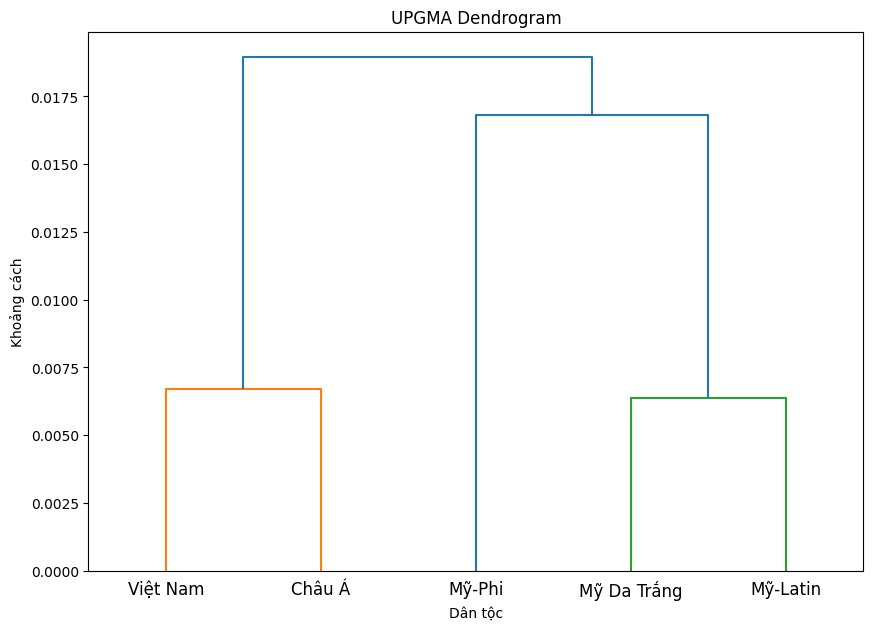

In [ ]:
import scipy.cluster.hierarchy as sch
import numpy as np
def calculate_upgma(fst_matrix):
    # Convert FST DataFrame to a square distance matrix
    distance_matrix = fst_matrix.astype(float).values
    # Ensure that the matrix is symmetric
    np.fill_diagonal(distance_matrix, 0)
    # Create the UPGMA tree using the distance matrix
    linkage_matrix = sch.linkage(distance_matrix, method='average')

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    sch.dendrogram(linkage_matrix, labels=fst_matrix.index.tolist(), leaf_rotation=0)
    plt.title('UPGMA Dendrogram')
    plt.xlabel('Dân tộc')
    plt.ylabel('Khoảng cách')
    plt.show()

calculate_upgma(fst_matrix)


In [ ]:
## Add data Việt Nam, Châu Á, Mỹ-Phi, Mỹ Da Trắng, Mỹ-Latin

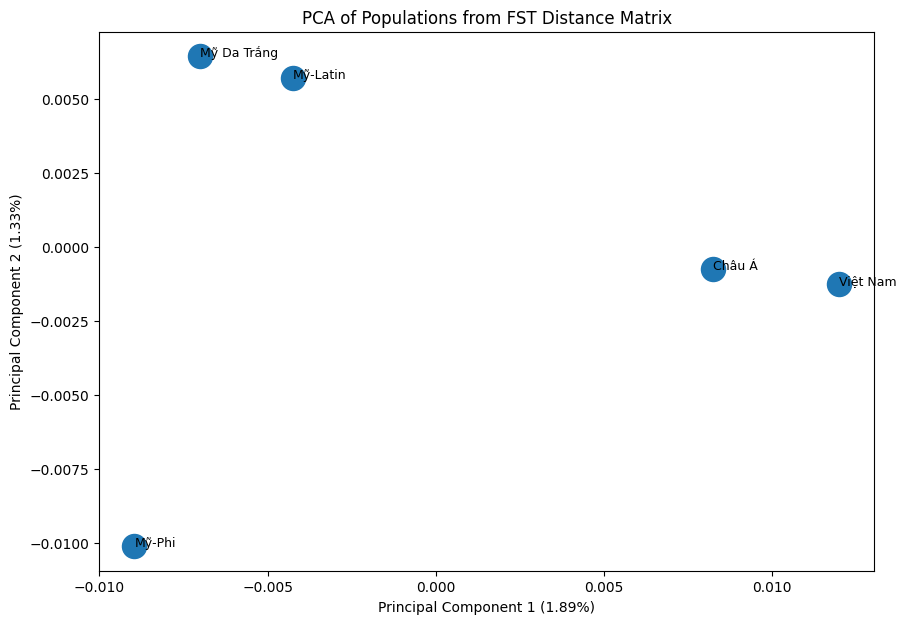

array([0.01894005, 0.0133403 ])

In [ ]:
from sklearn.decomposition import PCA

def pca_from_distance_matrix(fst_matrix):
    # Convert FST DataFrame to a square distance matrix
    distance_matrix = fst_matrix.astype(float).values

    # Convert distance to similarity by taking the negative value (for PCA)
    # This assumes that the values are non-negative; otherwise, consider centering the data differently.
    similarity_matrix = -distance_matrix

    # Perform PCA
    pca = PCA(n_components=2)  # Change n_components if you want more dimensions
    principal_components = pca.fit_transform(similarity_matrix)

    # Create a DataFrame for the PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Population'] = fst_matrix.index.tolist()

    return pca_df, pca, principal_components

def plot_pca(pca_df, pca):
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], marker='o', s=300)

    for i, txt in enumerate(pca_df['Population']):
        plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=9)

    plt.title('PCA of Populations from FST Distance Matrix')
    plt.xlabel(f'Principal Component 1 ({round(pca.singular_values_[0]*100, 2)}%)')
    plt.ylabel(f'Principal Component 2 ({round(pca.singular_values_[1]*100, 2)}%)')
    plt.show()

# Example usage
# Assuming 'fst_results' is your FST distance matrix DataFrame
pca_df, pca, principal_components = pca_from_distance_matrix(fst_matrix)
plot_pca(pca_df, pca)
pca.singular_values_

In [ ]:
df_af_subpop_pca.columns

Index(['CSF1PO', 'D10S1248', 'D12S391', 'D13S317', 'D16S539', 'D18S51',
       'D19S433', 'D1S1656', 'D21S11', 'D22S1045', 'D2S1338', 'D2S441',
       'D3S1358', 'D5S818', 'D6S1043', 'D7S820', 'D8S1179', 'FGA', 'Penta_D',
       'Penta_E', 'TH01', 'TPOX', 'vWA', 'pop'],
      dtype='object')

In [ ]:
def applied_AF2Allele(pop_str, af_dataframe):
    for col in pop_str.columns:
        # Skip non-marker columns
        if col not in ['ind', 'pop']:
            if col.__contains__(".1") == False:
                allele = row[col]  # Current allele value
                pop = row['pop']

                # Find matching row in af_all for the allele and population
                match = df_af_subpop_pca[(df_af_subpop_pca.index == allele) & (df_af_subpop_pca['pop'] == pop)]

                # If a match is found, replace the allele with the corresponding AF
                if not match.empty and col in match.columns:
                    pop_str.at[index, col] = match[col].values[0]
            elif col.__contains__(".1") == True:
                allele = row[col]  # Current allele value
                pop = row['pop']

                # Find matching row in df_af_subpop_pca for the allele and population
                match = df_af_subpop_pca[(df_af_subpop_pca.index == allele) & (df_af_subpop_pca['pop'] == pop)]
                col_split = col.split(".")[0]
                # If a match is found, replace the allele with the corresponding AF
                if not match.empty and col_split in match.columns:
                    pop_str.at[index, col] = match[col_split].values[0]

        return pop_str


In [ ]:
for index, row in pop_str.iterrows():
    for col in pop_str.columns:
        # Skip non-marker columns
        if col not in ['ind', 'pop']:
            if col.__contains__(".1") == False:
                allele = row[col]  # Current allele value
                pop = row['pop']

                # Find matching row in af_all for the allele and population
                match = df_af_subpop_pca[(df_af_subpop_pca.index == allele) & (df_af_subpop_pca['pop'] == pop)]

                # If a match is found, replace the allele with the corresponding AF
                if not match.empty and col in match.columns:
                    pop_str.at[index, col] = match[col].values[0]
            elif col.__contains__(".1") == True:
                allele = row[col]  # Current allele value
                pop = row['pop']

                # Find matching row in df_af_subpop_pca for the allele and population
                match = df_af_subpop_pca[(df_af_subpop_pca.index == allele) & (df_af_subpop_pca['pop'] == pop)]
                col_split = col.split(".")[0]
                # If a match is found, replace the allele with the corresponding AF
                if not match.empty and col_split in match.columns:
                    pop_str.at[index, col] = match[col_split].values[0]





Cluster with PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

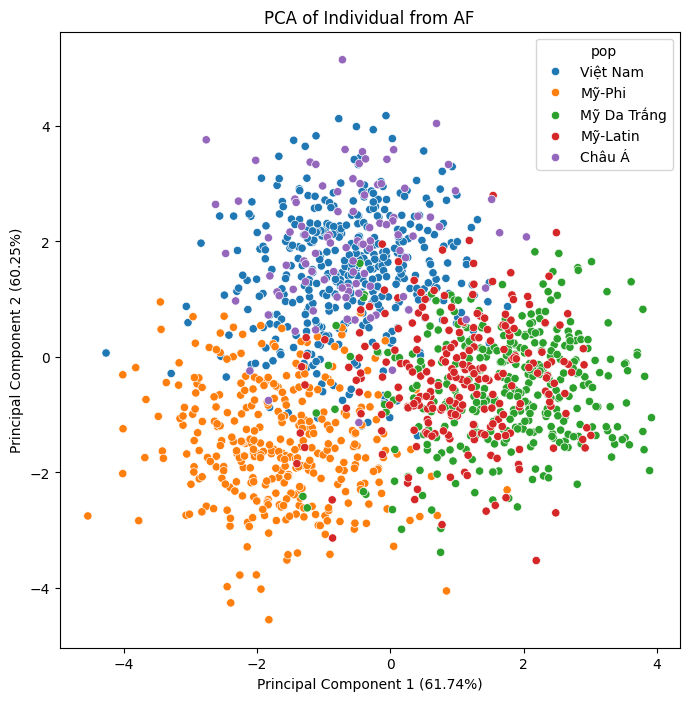

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_cp = pop_str.dropna()
X = pop_str.iloc[:, 2:-1].fillna(0).values
# replace NaN with 0

y = pop_str.iloc[:, -1].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([principalDf, pop_str[['pop']]], axis = 1)
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x=finalDf[0], y=finalDf[1], hue='pop', data=finalDf)

plt.title('PCA of Individual from AF')
plt.xlabel(f'Principal Component 1 ({round(pca.singular_values_[0], 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.singular_values_[1], 2)}%)')
plt.show()

####Plot circle for each of Population

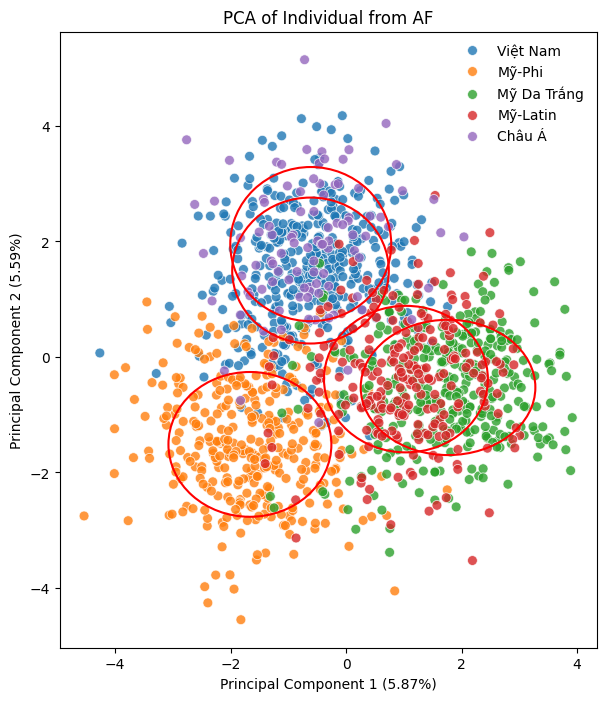

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))

# Draw scatterplot
sns.scatterplot(x=finalDf[0], y=finalDf[1], hue='pop', data=finalDf, ax=ax, s=50, alpha=0.8)

# Add ellipses around clusters
for pop_group in finalDf['pop'].unique():
    group_data = finalDf[finalDf['pop'] == pop_group]
    x_mean = group_data[0].mean()
    y_mean = group_data[1].mean()
    x_std = group_data[0].std()
    y_std = group_data[1].std()

    # Draw an ellipse to represent the cluster
    ellipse = Ellipse(
        (x_mean, y_mean),
        width=3* x_std,  # Adjust scale factor as needed
        height=2.5* y_std,  # Adjust scale factor as needed
        edgecolor='red',
        facecolor='none',
        linewidth=1.5
    )
    ax.add_patch(ellipse)

# Set aspect ratio to 'equal'
ax.set_aspect('equal', 'box')

# Adjust plot labels and title
plt.title('PCA of Individual from AF')
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend(loc='best', frameon=False)
plt.show()


### Model dự đoán dân tộc

In [ ]:
X.shape

(1444, 45)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AA": "Mỹ-Phi", "Asian": "Châu Á", "VN": "Việt Nam"}
df['pop'] = df['pop'].map(populations)
enc = OneHotEncoder()
X = df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = BernoulliNB()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))


              precision    recall  f1-score   support

      Châu Á       0.57      0.14      0.22        29
 Mỹ Da Trắng       0.78      0.83      0.80       108
    Mỹ-Latin       0.70      0.61      0.65        71
      Mỹ-Phi       0.88      0.94      0.91       103
    Việt Nam       0.79      0.90      0.84       123

    accuracy                           0.79       434
   macro avg       0.75      0.68      0.69       434
weighted avg       0.78      0.79      0.78       434



<ipython-input-83-d44be226741a>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)


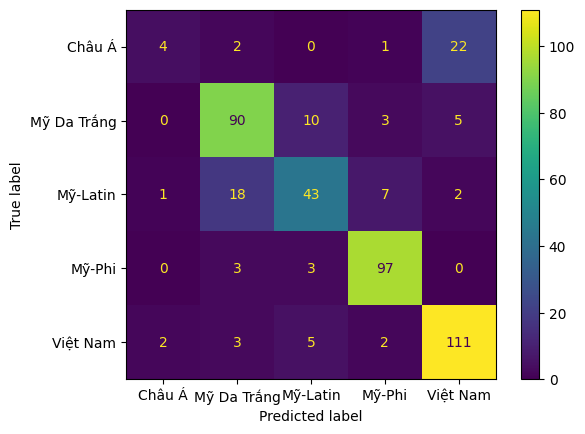

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))

              precision    recall  f1-score   support

      Châu Á       0.57      0.14      0.22        29
 Mỹ Da Trắng       0.78      0.83      0.80       108
    Mỹ-Latin       0.70      0.61      0.65        71
      Mỹ-Phi       0.88      0.94      0.91       103
    Việt Nam       0.79      0.90      0.84       123

    accuracy                           0.79       434
   macro avg       0.75      0.68      0.69       434
weighted avg       0.78      0.79      0.78       434



## Dự đoán 1 mẫu

In [ ]:
# prob = model.predict_proba(X_test)
!gdown 1CYDKEnnIjcp7sfAPWxTCW2NjLQxRgojK

Downloading...
From: https://drive.google.com/uc?id=1CYDKEnnIjcp7sfAPWxTCW2NjLQxRgojK
To: /content/example_sample.csv
100% 618/618 [00:00<00:00, 2.70MB/s]


In [ ]:
def inference(sample_path, model):
  sample = pd.read_csv(sample_path, sep = ",")
  print("Ground truth:", sample["pop"].values[0])
  sample_test = sample.iloc[:, 2:].fillna(0)
  sample_test = enc.transform(sample_test).toarray()
  prob = model.predict_proba(sample_test)
  results = {}
  for i in range(len(model.classes_)):
    results[model.classes_[i]] = round(prob[0][i],5)
  # convert result to dataframe
  results = pd.DataFrame(results, index=[0])
  results = results.T
  results.columns = ["Probability"]
  results = results.sort_values(by="Probability", ascending=False)
  return results

# Example usage (assuming 'model' and 'enc' are defined elsewhere in your code)
probability = inference("/content/example_sample.csv", model)
probability.head()

Ground truth: AA


,Probability
Mỹ-Phi,1.0
Châu Á,0.0
Mỹ Da Trắng,0.0
Mỹ-Latin,0.0
Việt Nam,0.0


## Thêm các mô hình Học máy dự đoán khác: Random Forest, SVM, XGBoost, Neural Network, Decision Tree

#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AA": "Mỹ-Phi", "Asian": "Châu Á", "VN": "Việt Nam"}
df['pop'] = df['pop'].map(populations)
enc = OneHotEncoder()
X = df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))


<ipython-input-88-ba34cb83a014>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)


              precision    recall  f1-score   support

      Châu Á       0.00      0.00      0.00        29
 Mỹ Da Trắng       0.58      0.79      0.67       108
    Mỹ-Latin       0.81      0.18      0.30        71
      Mỹ-Phi       0.82      0.85      0.84       103
    Việt Nam       0.67      0.90      0.77       123

    accuracy                           0.68       434
   macro avg       0.58      0.55      0.52       434
weighted avg       0.66      0.68      0.63       434



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


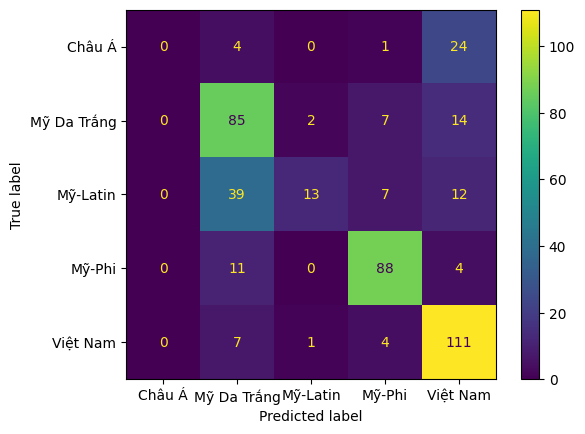

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

#SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AA": "Mỹ-Phi", "Asian": "Châu Á", "VN": "Việt Nam"}
df['pop'] = df['pop'].map(populations)
enc = OneHotEncoder()
X = df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = SVC()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))


<ipython-input-90-f4e6d22d7bf8>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)


              precision    recall  f1-score   support

      Châu Á       0.00      0.00      0.00        29
 Mỹ Da Trắng       0.68      0.84      0.75       108
    Mỹ-Latin       0.66      0.41      0.50        71
      Mỹ-Phi       0.88      0.90      0.89       103
    Việt Nam       0.74      0.90      0.81       123

    accuracy                           0.75       434
   macro avg       0.59      0.61      0.59       434
weighted avg       0.69      0.75      0.71       434



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


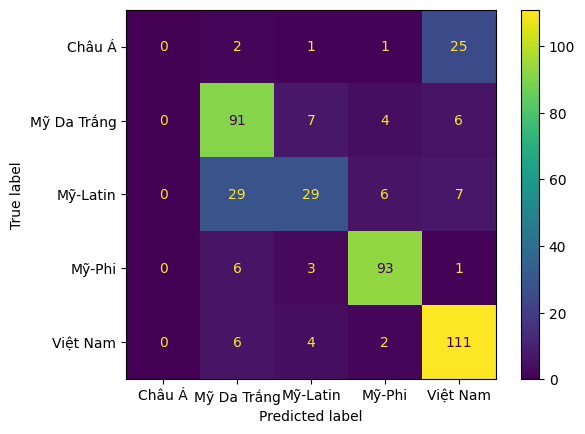

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

#XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AA": "Mỹ-Phi", "Asian": "Châu Á", "VN": "Việt Nam"}
df['pop'] = df['pop'].map(populations)
enc = OneHotEncoder()
X = df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))


<ipython-input-107-bf43555d56e3>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)


              precision    recall  f1-score   support

      Châu Á       0.50      0.10      0.17        29
 Mỹ Da Trắng       0.65      0.74      0.69       108
    Mỹ-Latin       0.62      0.41      0.49        71
      Mỹ-Phi       0.87      0.87      0.87       103
    Việt Nam       0.71      0.89      0.79       123

    accuracy                           0.72       434
   macro avg       0.67      0.60      0.60       434
weighted avg       0.70      0.72      0.69       434



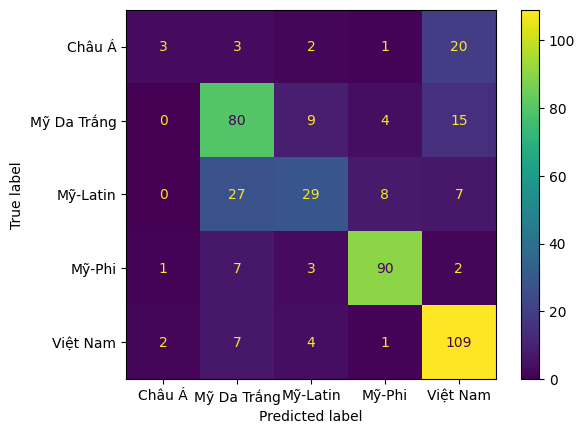

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

#AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AA": "Mỹ-Phi", "Asian": "Châu Á", "VN": "Việt Nam"}
df['pop'] = df['pop'].map(populations)
enc = OneHotEncoder()
X = df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))


<ipython-input-109-7a5b93cbe1ee>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)


              precision    recall  f1-score   support

      Châu Á       0.38      0.10      0.16        29
 Mỹ Da Trắng       0.64      0.75      0.69       108
    Mỹ-Latin       0.61      0.39      0.48        71
      Mỹ-Phi       0.85      0.86      0.86       103
    Việt Nam       0.73      0.88      0.80       123

    accuracy                           0.71       434
   macro avg       0.64      0.60      0.60       434
weighted avg       0.69      0.71      0.69       434



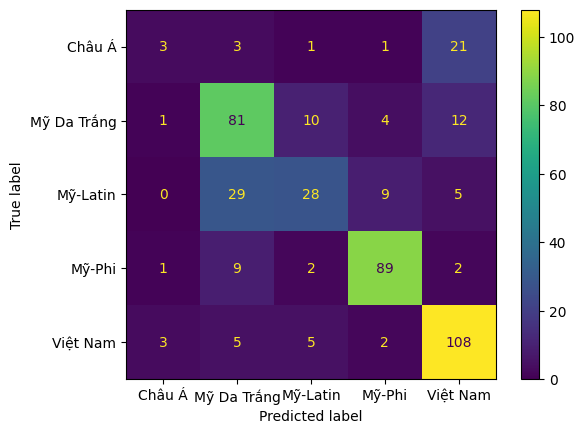

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

#Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AA": "Mỹ-Phi", "Asian": "Châu Á", "VN": "Việt Nam"}
df['pop'] = df['pop'].map(populations)
enc = OneHotEncoder()
X = df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))


<ipython-input-111-350c84a7beef>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)


              precision    recall  f1-score   support

      Châu Á       0.24      0.21      0.22        29
 Mỹ Da Trắng       0.49      0.44      0.47       108
    Mỹ-Latin       0.29      0.32      0.30        71
      Mỹ-Phi       0.60      0.57      0.59       103
    Việt Nam       0.65      0.70      0.67       123

    accuracy                           0.51       434
   macro avg       0.45      0.45      0.45       434
weighted avg       0.51      0.51      0.51       434



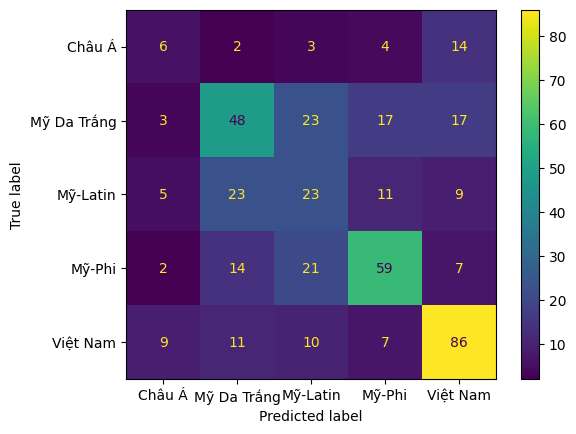

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

#Neural Network Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AA": "Mỹ-Phi", "Asian": "Châu Á", "VN": "Việt Nam"}
df['pop'] = df['pop'].map(populations)
enc = OneHotEncoder()
X = df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))


<ipython-input-113-4a1f6686976a>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =  pd.read_csv('/content/str_pop.txt', delim_whitespace=True)


              precision    recall  f1-score   support

      Châu Á       0.37      0.38      0.37        29
 Mỹ Da Trắng       0.68      0.69      0.69       108
    Mỹ-Latin       0.52      0.48      0.50        71
      Mỹ-Phi       0.81      0.81      0.81       103
    Việt Nam       0.78      0.80      0.79       123

    accuracy                           0.69       434
   macro avg       0.63      0.63      0.63       434
weighted avg       0.69      0.69      0.69       434



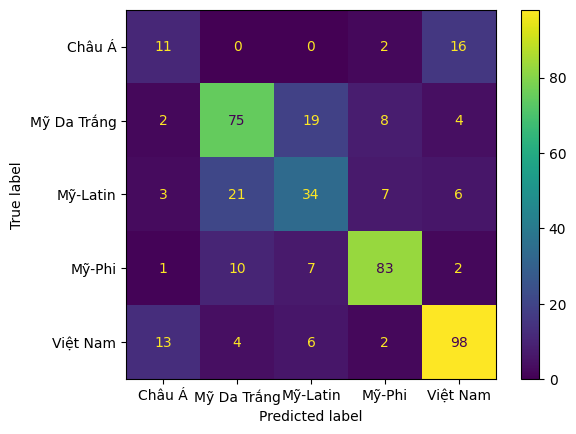

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

### Sử dụng thêm data của các dân tộc

In [ ]:
!gdown 1XdpSZNyKVCQkOTlOvt4-rYkMC-0wY3cq

Downloading...
From: https://drive.google.com/uc?id=1XdpSZNyKVCQkOTlOvt4-rYkMC-0wY3cq
To: /content/simulated_data.tsv
100% 2.21M/2.21M [00:00<00:00, 150MB/s]


In [ ]:
added_data_df = pd.read_csv("/content/simulated_data.tsv", sep="\t")
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AfAm": "Mỹ-Phi", "Asian": "Châu Á", "Vietnam": "Việt Nam"}

added_data_df['pop'] = added_data_df['pop'].map(populations)
added_data_df.head()


,ind,pop,CSF1PO,CSF1PO.1,D10S1248,D10S1248.1,D12S391,D12S391.1,D13S317,D13S317.1,...,Penta_D,Penta_D.1,Penta_E,Penta_E.1,TH01,TH01.1,TPOX,TPOX.1,vWA,vWA.1
0,1_Hisp,Mỹ-Latin,13.0,23.0,27.0,27.0,50.0,30.0,20.0,20.0,...,17.0,20.0,34.0,4.0,10.0,10.0,8.0,8.0,30.0,41.0
1,2_Hisp,Mỹ-Latin,20.0,10.0,23.0,23.0,30.0,41.0,20.0,17.0,...,23.0,23.0,17.0,17.0,5.0,7.0,8.0,8.0,37.0,30.0
2,3_Hisp,Mỹ-Latin,17.0,20.0,23.0,34.0,41.0,45.0,20.0,20.0,...,23.0,23.0,27.0,23.0,8.0,12.0,5.0,17.0,37.0,41.0
3,4_Hisp,Mỹ-Latin,13.0,13.0,34.0,30.0,57.0,37.0,10.0,23.0,...,13.0,23.0,7.0,30.0,7.0,7.0,8.0,7.0,30.0,27.0
4,5_Hisp,Mỹ-Latin,17.0,17.0,27.0,30.0,50.0,45.0,20.0,17.0,...,13.0,13.0,13.0,7.0,10.0,12.0,8.0,8.0,37.0,41.0


In [ ]:
for index, row in added_data_df.iterrows():
    for col in added_data_df.columns:
        # Skip non-marker columns
        if col not in ['ind', 'pop']:
            if col.__contains__(".1") == False:
                allele = row[col]  # Current allele value
                pop = row['pop']

                # Find matching row in af_all for the allele and population
                match = df_af_subpop_pca[(df_af_subpop_pca.index == allele) & (df_af_subpop_pca['pop'] == pop)]

                # If a match is found, replace the allele with the corresponding AF
                if not match.empty and col in match.columns:
                    added_data_df.at[index, col] = match[col].values[0]
            elif col.__contains__(".1") == True:
                allele = row[col]  # Current allele value
                pop = row['pop']

                # Find matching row in df_af_subpop_pca for the allele and population
                match = df_af_subpop_pca[(df_af_subpop_pca.index == allele) & (df_af_subpop_pca['pop'] == pop)]
                col_split = col.split(".")[0]
                # If a match is found, replace the allele with the corresponding AF
                if not match.empty and col_split in match.columns:
                    added_data_df.at[index, col] = match[col_split].values[0]





In [ ]:
added_data_df

,ind,pop,CSF1PO,CSF1PO.1,D10S1248,D10S1248.1,D12S391,D12S391.1,D13S317,D13S317.1,...,Penta_D,Penta_D.1,Penta_E,Penta_E.1,TH01,TH01.1,TPOX,TPOX.1,vWA,vWA.1
0,1_Hisp,Mỹ-Latin,0.059,NaN,NaN,NaN,50.000,NaN,NaN,NaN,...,0.002,0.002,NaN,4.000,0.008,0.008,0.485,0.485,NaN,41.000
1,2_Hisp,Mỹ-Latin,NaN,0.237,NaN,NaN,NaN,41.000,NaN,NaN,...,NaN,NaN,0.055,0.055,NaN,0.297,0.485,0.485,37.000,NaN
2,3_Hisp,Mỹ-Latin,NaN,NaN,NaN,NaN,41.000,45.000,NaN,NaN,...,NaN,NaN,NaN,0.006,0.091,0.002,NaN,NaN,37.000,41.000
3,4_Hisp,Mỹ-Latin,0.059,0.059,NaN,NaN,57.000,37.000,0.100,NaN,...,0.144,NaN,0.117,NaN,0.297,0.297,0.485,0.006,NaN,NaN
4,5_Hisp,Mỹ-Latin,NaN,NaN,NaN,NaN,50.000,45.000,NaN,NaN,...,0.144,0.144,0.093,0.117,0.008,0.002,0.485,0.485,37.000,41.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11286,247490_VN,Việt Nam,0.373,0.373,0.075,0.229,0.212,0.196,0.317,0.317,...,NaN,NaN,NaN,NaN,0.357,0.357,0.531,0.278,0.089,0.089
11287,247901_VN,Việt Nam,0.373,0.373,0.348,0.229,0.060,0.196,0.317,0.161,...,NaN,NaN,NaN,NaN,0.357,0.357,0.531,0.042,0.294,0.216
11288,248084_VN,Việt Nam,0.203,0.203,0.348,0.229,0.196,0.112,0.317,0.114,...,NaN,NaN,NaN,NaN,0.357,0.048,0.531,0.278,0.294,0.294
11289,248085_VN,Việt Nam,0.203,0.373,0.348,0.229,0.212,0.098,0.114,0.248,...,NaN,NaN,NaN,NaN,0.357,0.048,0.531,0.278,0.216,0.089


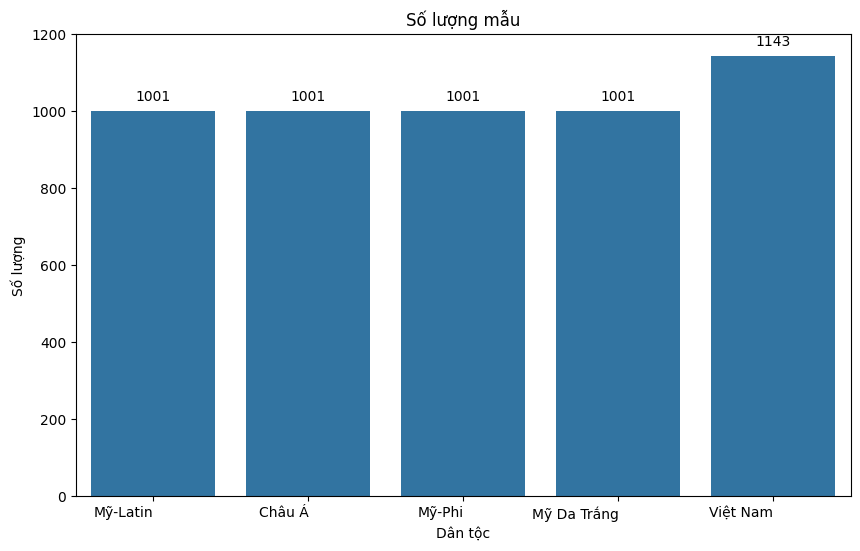

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='pop', data=added_data_df)

# Add labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset label by 5 pixels
                textcoords="offset points",
                ha='center', va='bottom')

plt.title('Số lượng mẫu')
plt.xlabel('Dân tộc')
plt.ylabel('Số lượng')
plt.xticks(rotation=0, ha='right')
plt.show()


In [ ]:
added_data_df.columns[2:-1]

Index(['CSF1PO', 'CSF1PO.1', 'D10S1248', 'D10S1248.1', 'D12S391', 'D12S391.1',
       'D13S317', 'D13S317.1', 'D16S539', 'D16S539.1', 'D18S51', 'D18S51.1',
       'D19S433', 'D19S433.1', 'D1S1656', 'D1S1656.1', 'D21S11', 'D21S11.1',
       'D22S1045', 'D22S1045.1', 'D2S1338', 'D2S1338.1', 'D2S441', 'D2S441.1',
       'D3S1358', 'D3S1358.1', 'D5S818', 'D5S818.1', 'D6S1043', 'D6S1043.1',
       'D7S820', 'D7S820.1', 'D8S1179', 'D8S1179.1', 'FGA', 'FGA.1', 'Penta_D',
       'Penta_D.1', 'Penta_E', 'Penta_E.1', 'TH01', 'TH01.1', 'TPOX', 'TPOX.1',
       'vWA'],
      dtype='object')

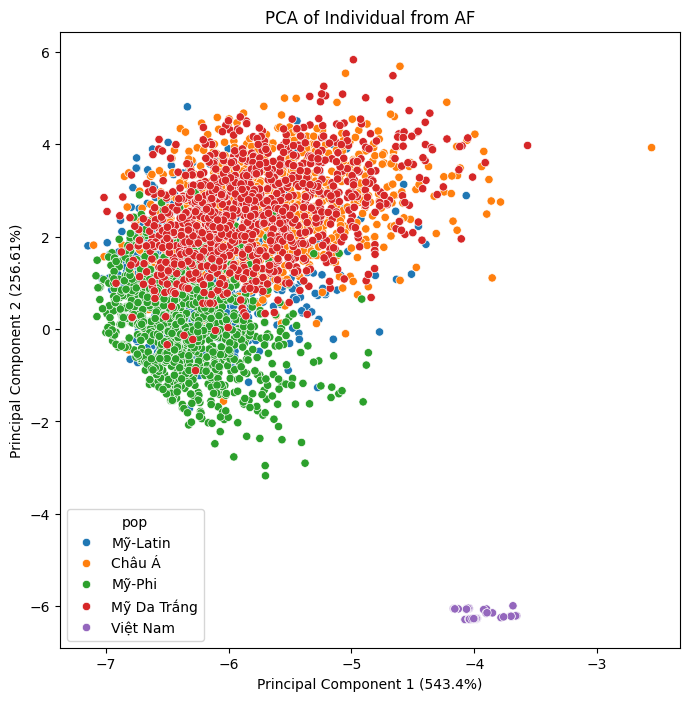

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_cp = added_data_df.dropna()
# X get data column ! "ind" and "pop"
X = added_data_df[added_data_df.columns[2:-1]].fillna(0).values

y = added_data_df['pop']
X = StandardScaler().fit_transform(X)

# X = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([principalDf, added_data_df[['pop']]], axis = 1)
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x=finalDf[0], y=finalDf[1], hue='pop', data=finalDf)

plt.title('PCA of Individual from AF')
plt.xlabel(f'Principal Component 1 ({round(pca.singular_values_[0], 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.singular_values_[1], 2)}%)')
plt.show()

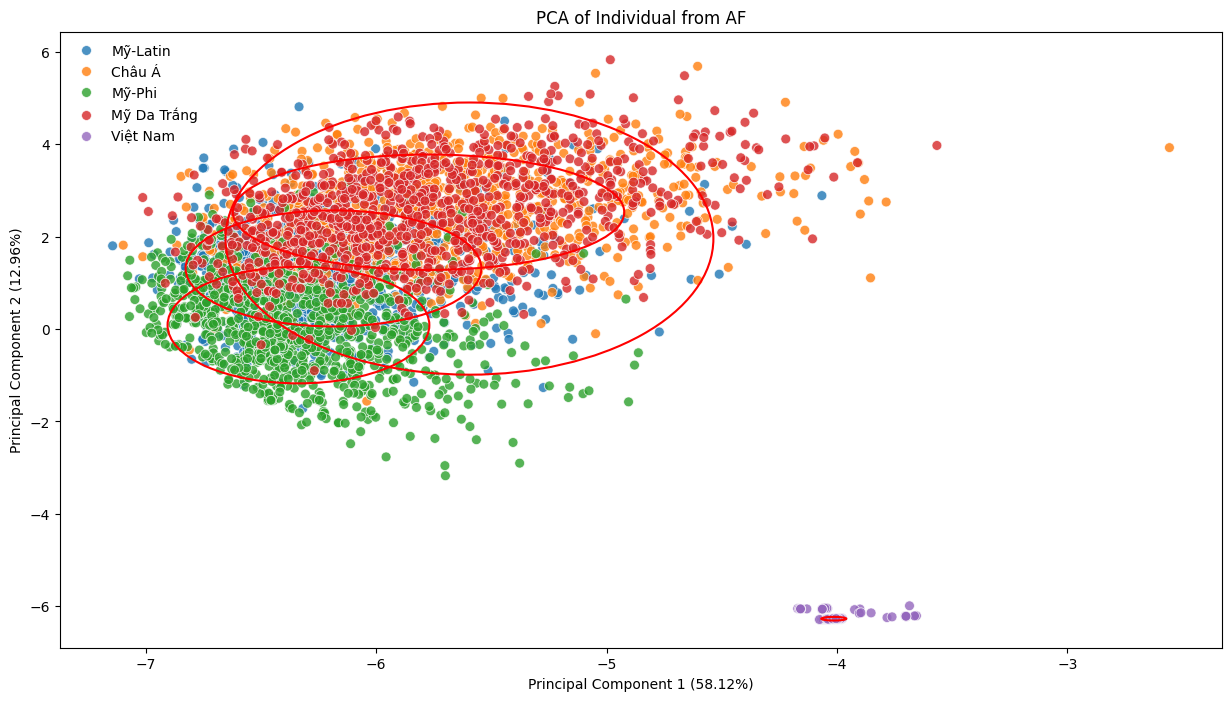

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import numpy as np

fig, ax = plt.subplots(figsize=(15, 8))

# Draw scatterplot
sns.scatterplot(x=finalDf[0], y=finalDf[1], hue='pop', data=finalDf, ax=ax, s=50, alpha=0.8)

# Add ellipses around clusters
for pop_group in finalDf['pop'].unique():
    group_data = finalDf[finalDf['pop'] == pop_group]
    x_mean = group_data[0].mean()
    y_mean = group_data[1].mean()
    x_std = group_data[0].std()
    y_std = group_data[1].std()

    # Draw an ellipse to represent the cluster
    ellipse = Ellipse(
        (x_mean, y_mean),
        width=3* x_std,  # Adjust scale factor as needed
        height=2.5* y_std,  # Adjust scale factor as needed
        edgecolor='red',
        facecolor='none',
        linewidth=1.5
    )
    ax.add_patch(ellipse)

# # Set aspect ratio to 'equal'
# ax.set_aspect('equal', 'box')

# Adjust plot labels and title
plt.title('PCA of Individual from AF')
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend(loc='best', frameon=False)
plt.show()


##Classify with simulated data with ML model

##Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
added_data_df = pd.read_csv("/content/simulated_data.tsv", sep="\t")
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AfAm": "Mỹ-Phi", "Asian": "Châu Á", "Vietnam": "Việt Nam"}

added_data_df['pop'] = added_data_df['pop'].map(populations)
added_data_df = added_data_df.dropna(subset=['pop'])

enc = OneHotEncoder()
X = added_data_df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = added_data_df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = BernoulliNB()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictor))


              precision    recall  f1-score   support

      Châu Á       0.25      0.00      0.01       301
 Mỹ Da Trắng       0.26      0.33      0.29       300
    Mỹ-Latin       0.28      0.35      0.31       301
      Mỹ-Phi       0.25      0.34      0.29       300
    Việt Nam       0.94      1.00      0.97       343

    accuracy                           0.42      1545
   macro avg       0.40      0.41      0.37      1545
weighted avg       0.41      0.42      0.39      1545



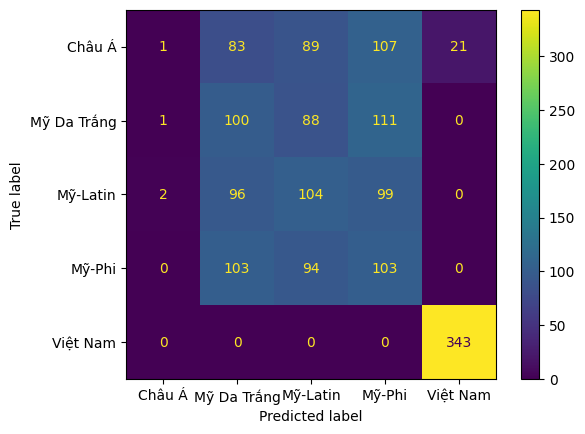

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

##Random Forest


In [ ]:
added_data_df

,ind,pop,CSF1PO,CSF1PO.1,D10S1248,D10S1248.1,D12S391,D12S391.1,D13S317,D13S317.1,...,Penta_D,Penta_D.1,Penta_E,Penta_E.1,TH01,TH01.1,TPOX,TPOX.1,vWA,vWA.1
0,1_Hisp,Mỹ-Latin,13.0,23.0,27.0,27.0,50.0,30.0,20.0,20.0,...,17.0,20.0,34.0,4.0,10.0,10.0,8.0,8.0,30.0,41.0
1,2_Hisp,Mỹ-Latin,20.0,10.0,23.0,23.0,30.0,41.0,20.0,17.0,...,23.0,23.0,17.0,17.0,5.0,7.0,8.0,8.0,37.0,30.0
2,3_Hisp,Mỹ-Latin,17.0,20.0,23.0,34.0,41.0,45.0,20.0,20.0,...,23.0,23.0,27.0,23.0,8.0,12.0,5.0,17.0,37.0,41.0
3,4_Hisp,Mỹ-Latin,13.0,13.0,34.0,30.0,57.0,37.0,10.0,23.0,...,13.0,23.0,7.0,30.0,7.0,7.0,8.0,7.0,30.0,27.0
4,5_Hisp,Mỹ-Latin,17.0,17.0,27.0,30.0,50.0,45.0,20.0,17.0,...,13.0,13.0,13.0,7.0,10.0,12.0,8.0,8.0,37.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11286,247490_VN,Việt Nam,12.0,12.0,12.0,15.0,19.0,20.0,8.0,8.0,...,NaN,NaN,NaN,NaN,9.0,9.0,8.0,11.0,19.0,19.0
11287,247901_VN,Việt Nam,12.0,12.0,13.0,15.0,17.0,20.0,8.0,12.0,...,NaN,NaN,NaN,NaN,7.0,9.0,8.0,10.0,14.0,18.0
11288,248084_VN,Việt Nam,10.0,10.0,13.0,15.0,20.0,21.0,8.0,9.0,...,NaN,NaN,NaN,NaN,7.0,9.3,8.0,11.0,14.0,14.0
11289,248085_VN,Việt Nam,10.0,12.0,13.0,15.0,19.0,22.0,9.0,11.0,...,NaN,NaN,NaN,NaN,9.0,9.3,8.0,11.0,18.0,19.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
added_data_df = pd.read_csv("/content/simulated_data.tsv", sep="\t")
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AfAm": "Mỹ-Phi", "Asian": "Châu Á", "Vietnam": "Việt Nam"}
added_data_df['pop'] = added_data_df['pop'].map(populations)
added_data_df = added_data_df.dropna(subset=['pop'])
enc = OneHotEncoder()
X = added_data_df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = added_data_df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
prob = model.predict_proba(X_test)
print(classification_report(y_test, predictor))


              precision    recall  f1-score   support

      Châu Á       0.30      0.26      0.28       301
 Mỹ Da Trắng       0.25      0.28      0.27       300
    Mỹ-Latin       0.26      0.28      0.27       301
      Mỹ-Phi       0.27      0.25      0.26       300
    Việt Nam       1.00      1.00      1.00       343

    accuracy                           0.43      1545
   macro avg       0.42      0.41      0.41      1545
weighted avg       0.43      0.43      0.43      1545



##SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
added_data_df = pd.read_csv("/content/simulated_data.tsv", sep="\t")
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AfAm": "Mỹ-Phi", "Asian": "Châu Á", "Vietnam": "Việt Nam"}

added_data_df['pop'] = added_data_df['pop'].map(populations)
added_data_df = added_data_df.dropna(subset=['pop'])

enc = OneHotEncoder()
X = added_data_df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = added_data_df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = SVC()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
print(classification_report(y_test, predictor))


              precision    recall  f1-score   support

      Châu Á       0.29      0.22      0.25       301
 Mỹ Da Trắng       0.27      0.30      0.28       300
    Mỹ-Latin       0.28      0.28      0.28       301
      Mỹ-Phi       0.25      0.28      0.27       300
    Việt Nam       1.00      1.00      1.00       343

    accuracy                           0.43      1545
   macro avg       0.42      0.42      0.42      1545
weighted avg       0.43      0.43      0.43      1545



#XGboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
added_data_df = pd.read_csv("/content/simulated_data.tsv", sep="\t")
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AfAm": "Mỹ-Phi", "Asian": "Châu Á", "Vietnam": "Việt Nam"}
added_data_df['pop'] = added_data_df['pop'].map(populations)
added_data_df = added_data_df.dropna(subset=['pop'])

enc = OneHotEncoder()
X = added_data_df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = added_data_df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
print(classification_report(y_test, predictor))


              precision    recall  f1-score   support

      Châu Á       0.26      0.21      0.23       301
 Mỹ Da Trắng       0.26      0.27      0.26       300
    Mỹ-Latin       0.28      0.29      0.28       301
      Mỹ-Phi       0.26      0.29      0.27       300
    Việt Nam       1.00      1.00      1.00       343

    accuracy                           0.43      1545
   macro avg       0.41      0.41      0.41      1545
weighted avg       0.43      0.43      0.43      1545



##AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
added_data_df = pd.read_csv("/content/simulated_data.tsv", sep="\t")
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AfAm": "Mỹ-Phi", "Asian": "Châu Á", "Vietnam": "Việt Nam"}
added_data_df['pop'] = added_data_df['pop'].map(populations)
added_data_df = added_data_df.dropna(subset=['pop'])

enc = OneHotEncoder()
X = added_data_df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = added_data_df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
print(classification_report(y_test, predictor))


              precision    recall  f1-score   support

      Châu Á       0.27      0.21      0.24       301
 Mỹ Da Trắng       0.25      0.27      0.26       300
    Mỹ-Latin       0.28      0.29      0.28       301
      Mỹ-Phi       0.25      0.28      0.27       300
    Việt Nam       1.00      1.00      1.00       343

    accuracy                           0.43      1545
   macro avg       0.41      0.41      0.41      1545
weighted avg       0.43      0.43      0.43      1545



##Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
added_data_df = pd.read_csv("/content/simulated_data.tsv", sep="\t")
populations  = {'Cauc': "Mỹ Da Trắng", 'Hisp': "Mỹ-Latin", "AfAm": "Mỹ-Phi", "Asian": "Châu Á", "Vietnam": "Việt Nam"}
added_data_df['pop'] = added_data_df['pop'].map(populations)
added_data_df = added_data_df.dropna(subset=['pop'])
enc = OneHotEncoder()
X = added_data_df.iloc[:, 2:].fillna(0)
enc.fit(X)
X = enc.transform(X).toarray()
y = added_data_df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
model.fit(X_train, y_train)
predictor = model.predict(X_test)
# prob = model.predict_proba(X_test)
print(classification_report(y_test, predictor))


              precision    recall  f1-score   support

      Châu Á       0.30      0.27      0.28       301
 Mỹ Da Trắng       0.24      0.22      0.23       300
    Mỹ-Latin       0.25      0.24      0.25       301
      Mỹ-Phi       0.25      0.30      0.27       300
    Việt Nam       1.00      1.00      1.00       343

    accuracy                           0.42      1545
   macro avg       0.41      0.41      0.41      1545
weighted avg       0.42      0.42      0.42      1545

